In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


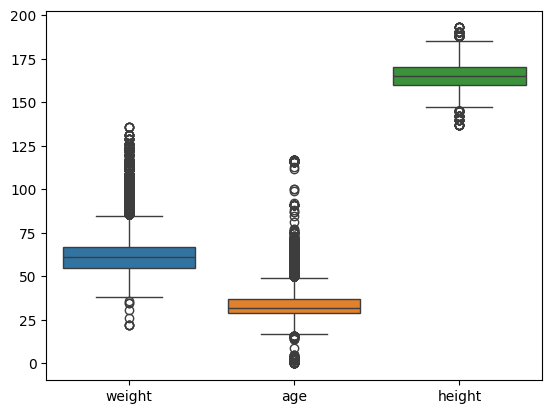

In [20]:
sns.boxplot(data=df[['weight', 'age', 'height']])
plt.show()

In [21]:
from scipy.stats import zscore
z_scores = zscore(df[['weight', 'age', 'height']])
outliers = (z_scores > 3) | (z_scores < -3)
outliers_data = df[outliers.any(axis=1)]
df = df[~outliers.any(axis=1)]


In [22]:
df.isnull().sum()


weight      0
age       252
height    326
size        0
dtype: int64

In [23]:
df['age'] = df['age'].fillna(df['age'].median())
df['height'] = df['height'].fillna(df['height'].median())

In [24]:
df.isnull().sum()


weight    0
age       0
height    0
size      0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['size_encoded'] = label_encoder.fit_transform(df['size'])


In [26]:
df

,weight,age,height,size,size_encoded
0,62,28.0,172.72,XL,3
1,59,36.0,167.64,L,0
2,61,34.0,165.10,M,1
3,65,27.0,175.26,L,0
4,62,45.0,172.72,M,1
...,...,...,...,...,...
119729,63,42.0,175.26,M,1
119730,45,29.0,154.94,S,2
119731,61,31.0,172.72,M,1
119732,74,31.0,167.64,XL,3


In [27]:
X = df[['weight', 'age', 'height']]  
y = df['size_encoded']  

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.5107301587301587
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.11      0.16      3460
           1       0.46      0.68      0.54      5890
           2       0.50      0.51      0.50      4472
           3       0.43      0.44      0.44      3841
           4       0.00      0.00      0.00        14
           5       0.57      0.38      0.46      2000
           6       0.74      0.76      0.75      3948

    accuracy                           0.51     23625
   macro avg       0.44      0.41      0.41     23625
weighted avg       0.50      0.51      0.49     23625



c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [32]:
new_data = np.array([[65, 30, 170],[50, 25, 160],[85, 40, 180]])  
new_data_scaled = scaler.transform(new_data)
new_predictions = log_reg.predict(new_data_scaled)
print("Predictions for new data:", new_predictions)
df[['size', 'size_encoded']].drop_duplicates()

Predictions for new data: [3 2 6]


c:\Users\kk061\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,size,size_encoded
0,XL,3
1,L,0
2,M,1
5,S,2
7,XXS,5
10,XXXL,6
1755,XXL,4
